In [2]:
#Loading Libraries
#Essentail Libraries
import numpy as np
import pandas as pd
import re

#Visualizaiotn 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud

#NLP Libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from gensim.models import Word2Vec
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#Data Importing
df = pd.read_csv('/kaggle/input/books-review/all_data.csv')
df.head()

,book_title,Book_series,book_rating,book_author,genre,reviewer_name,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",emma,202.\nThat’s the number of times that the word...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Emily May,I wish so much that I could tell you I loved t...,5


In [5]:
#Checking Nulls & dropping the empty ones
print(df.isnull().sum())
df.dropna(subset=['review'], inplace=True)
print(df.isnull().sum())

book_title           0
Book_series      12779
book_rating          0
book_author          0
genre              121
reviewer_name       25
review             742
ID                   0
dtype: int64
book_title           0
Book_series      12203
book_rating          0
book_author          0
genre               47
reviewer_name        0
review               0
ID                   0
dtype: int64


In [6]:
#Converting to list of strings
reviews = df['review'].astype(str).tolist()
reviews[0]

"202.\nThat’s the number of times that the word “mate,” in any of its hellish forms, is used in this book.\nTWO.\nHUNDRED.\nAND.\nTWO.\nhttps://emmareadstoomuch.wordpress.co...\nThat statistic alone should be enough to justify this one star rating. If you feel satisfied enough to just remove yourself from this review, run with that feeling. Because I have, like. Seven pages of sh*t to complain about.\nThat’s if I’m efficient.\nAnd I’ve never been an efficient reviewer. Once. In my life. I counted two hundred (and two) uses of a word over seven hundred pages. That shouldn’t scream “rational and in control of her passionate fury” to you.\nSo buckle up, buttercup. We’ve got some categories to run through.\nDISCLAIMER : This review is teeming with spoilers. It is also X-rated, due to the strength of my anger and the copious sex scenes in the source material.\nI HATE THESE CHARACTERS\nRhys makes me cringe harder than Renee Zellweger in Bridget Jones’ Diary. (At least that movie has both Col

In [7]:
#Removing html, tags etc.. + converting text to lower
reviews_clean =  [
    re.sub(r'<[^>]+>|http\S+|www\.\S+|[^a-zA-Z\s]', '', review.lower())
    for review in reviews
]
print(reviews_clean[0])


thats the number of times that the word mate in any of its hellish forms is used in this book
two
hundred
and
two

that statistic alone should be enough to justify this one star rating if you feel satisfied enough to just remove yourself from this review run with that feeling because i have like seven pages of sht to complain about
thats if im efficient
and ive never been an efficient reviewer once in my life i counted two hundred and two uses of a word over seven hundred pages that shouldnt scream rational and in control of her passionate fury to you
so buckle up buttercup weve got some categories to run through
disclaimer  this review is teeming with spoilers it is also xrated due to the strength of my anger and the copious sex scenes in the source material
i hate these characters
rhys makes me cringe harder than renee zellweger in bridget jones diary at least that movie has both colin firth and hugh grant to distract me from renee viciously critiquing her own body and like spilling

In [8]:
#Tokenizing the sentence into wrods
reviews_tokenized = [
    word_tokenize(review) 
    for review in reviews_clean
]

In [9]:
#Removing stop words and applying stemming
snow = SnowballStemmer('english')
stwd = stopwords.words('english')
reviews_prep = [
    [snow.stem(word) for word in review if word not in stwd] 
    for review in reviews_tokenized
]

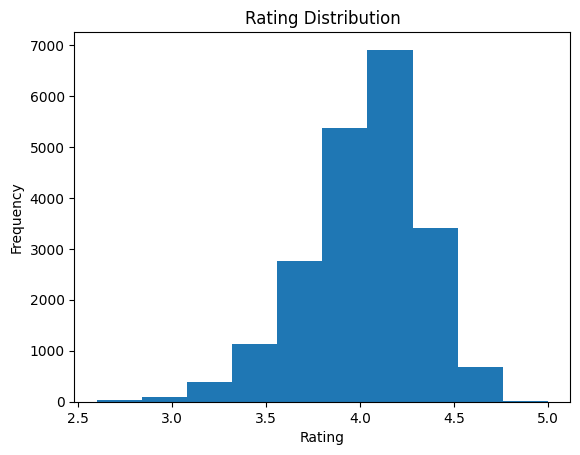

In [10]:
#Plotting Rating Distribution
plt.hist(df['book_rating'],bins = 10)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

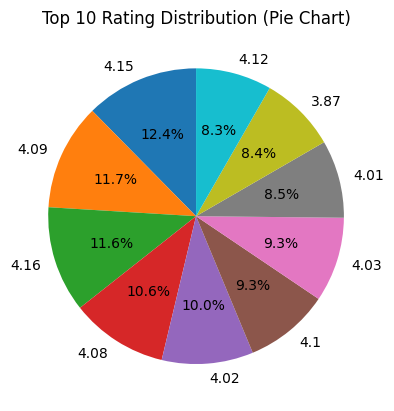

In [11]:
#Top 10 rating prectanges
rating_counts = df['book_rating'].value_counts().head(10)
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Rating Distribution (Pie Chart)')
plt.show()

In [12]:
#Getting the length of each senence
df['text_length'] = [len(review) for review in reviews_prep]

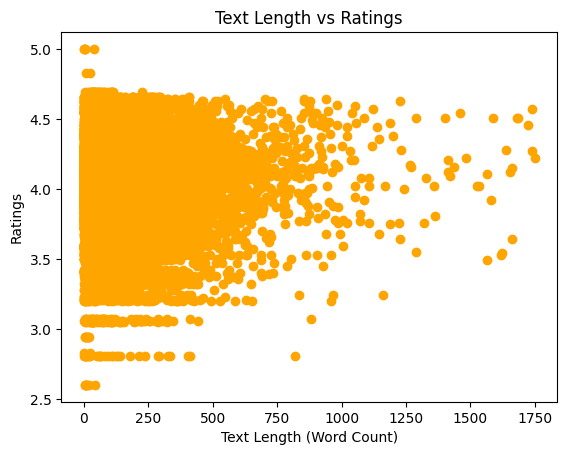

In [13]:
plt.scatter(df['text_length'], df['book_rating'], color='orange')
plt.title('Text Length vs Ratings')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Ratings')
plt.show()

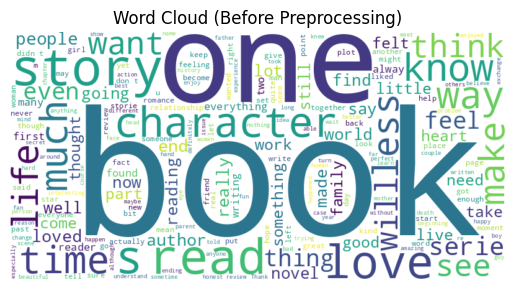

In [14]:
#Word CLoud for un processed text
text = ' '.join(df['review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud (Before Preprocessing)')
plt.axis('off')
plt.show()

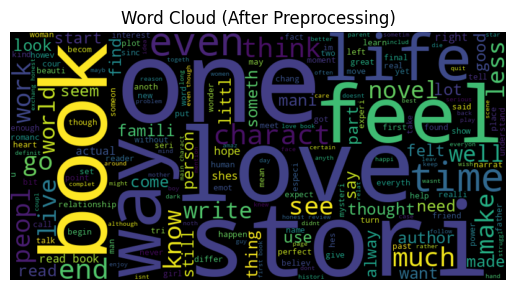

In [15]:

text = ' '.join( [word for review in reviews_prep for word in review])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud (After Preprocessing)')
plt.axis('off')
plt.show()

In [16]:
comparison_df = pd.DataFrame({
    'Original Review': df['review'].head(10),
    'Cleaned Review': reviews_clean[0:10]
})

print(comparison_df)

                                     Original Review  \
0  202.\nThat’s the number of times that the word...   
1  I need a black silk robe and a balcony to wear...   
2  THIS BOOK TOTALLY WRECKED ME. In the best poss...   
3  3.75 stars\n"Rhys stepped off the stairs and t...   
4  I wish so much that I could tell you I loved t...   
5  I’m wrecked. Because a Court of Wings and Ruin...   
6  Yay! Another one of my books won 2017 GR award...   
7  Congratulations-winner of Best Young Adult Fan...   
8  In these early days after the release, I'll sa...   
9  Glorious, thrilling and completely enthralling...   

                                      Cleaned Review  
0  \nthats the number of times that the word mate...  
1  i need a black silk robe and a balcony to wear...  
2  this book totally wrecked me in the best possi...  
3   stars\nrhys stepped off the stairs and took m...  
4  i wish so much that i could tell you i loved t...  
5  im wrecked because a court of wings and ruin w... 

In [17]:
#Modeling word2vec on cleaned data
model = Word2Vec(sentences=reviews_prep, vector_size=100, window=5, min_count=3, workers=4)
model.save("text_review_word2vec.model")

In [18]:
#Loading
model = Word2Vec.load("text_review_word2vec.model")

# Get vector representation for a word
vector = model.wv['great']
print(f"Vector for 'great':\n{vector}")

# Find similar words
similar_words = model.wv.most_similar('great', topn=3)
print(f"Words similar to 'great':\n{similar_words}")

Vector for 'great':
[ 2.4777129   0.5452226  -0.77212214 -1.2275757   0.26354024 -1.3500732
 -0.30411375  0.3564973  -0.885484    1.203367    0.83334774  0.4405572
 -0.06469085 -2.3553092   0.7131759   1.2410781  -0.41072068 -0.89145714
 -1.0373057  -1.7318178  -2.4187865   0.87391704  0.77036226 -0.26127586
  1.4077585   0.74672794 -1.0659592   1.2905043  -0.5590722   0.6734527
 -0.08664665 -1.2849092   0.9589878  -0.65912503  0.3071998  -1.7155924
 -1.5639616   1.0093235   0.05666878 -0.66277415 -0.16739656  1.7452561
  0.71560115 -0.28514796  1.8330505  -0.94755405  0.12812917  1.2310466
 -0.5269396  -1.1624031  -0.07993282  0.68694204  2.4602146   1.9150547
  0.84362787  0.72888714 -0.5291196  -0.8680464  -2.015671   -0.87793744
  0.00449578  0.521992    2.2973468   0.6121424  -0.5357409  -0.44280878
  0.6887243  -0.8352212   0.13530162 -1.3679515   0.7025873   2.1932044
  1.5191442   1.2757013   0.17014131  1.6913897   0.6815191   0.82860285
  1.989914    0.61178386  1.4202265   1

In [19]:
#Gettong top 20 similar words to great
similar_words = model.wv.most_similar('great', topn=20)
words = [word for word, _ in similar_words] + ['great']
vectors = np.array([model.wv[word] for word in words])

#PCA from ease of visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

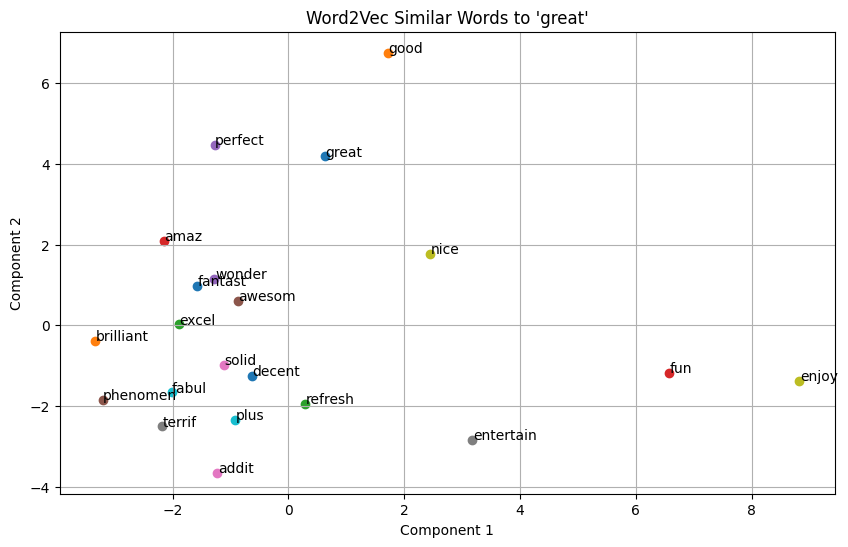

In [20]:
#plotting
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)

plt.title("Word2Vec Similar Words to 'great'")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()